# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [15]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2017-11-06 16:30:26--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Translacja www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Łączenie się z www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 302 Found
Lokalizacja: https://dl.dropboxusercontent.com/content_link/csqH26K7OngQG6IALQQDyxadr1e5xjlbRAaj5VBlcWBSnNT2wnFX3xQzunH9UPEi/file?dl=1 [podążanie]
--2017-11-06 16:30:27--  https://dl.dropboxusercontent.com/content_link/csqH26K7OngQG6IALQQDyxadr1e5xjlbRAaj5VBlcWBSnNT2wnFX3xQzunH9UPEi/file?dl=1
Translacja dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6, 2620:100:6022:6::a27d:4206
Łączenie się z dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 6211 (6,1K) [application/binary]
Zapis do: `mieszkania.csv'

mieszkania.csv      100%[===================>]   6,0

In [16]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [165]:
import math

lambda_coefficient = 0.001

def msle(ys, ps):
    """
    Mean squared logarithmic error.
    :param ys: ground truth prices
    :param ps: prediction prices
    """
    assert len(ys) == len(ps)
    return sum((math.log(1 + y_i) - math.log(1 + p_i)) ** 2 for y_i, p_i in zip(ys, ps)) / len(ys)

def regularization(weights):
    if weights is not None:
        # last weight is not included in the penalty
        result = lambda_coefficient * sum(w ** 2 for w in weights[:-1])
        return result
    else:
        return 0
    
def l2_loss(ys, ps, weights=None):
    """
    Least square error.
    :param ys: ground truth prices
    :param ps: prediction prices
    """
    # quicker solution
    # return np.linalg.norm(y - x) / len(ys)
    if weights is not None:
        return math.sqrt((sum((y - x) ** 2 for x, y in zip(ys, ps)) + regularization(weights)) / (2 * len(ys)))
    else:
        return math.sqrt(sum((y - x) ** 2 for x, y in zip(ys, ps)) / len(ys))

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [166]:
import pandas
import numpy as np
import scipy.stats.mstats


def get_dataset(path):
    with open(path) as flats:
        data = pandas.read_csv(flats)
    #data = data.sample(frac=1)
    return data

def get_training_dataset():
    data_path = 'mieszkania.csv'
    return get_dataset(data_path)

dataset = get_training_dataset()

def get_testing_dataset():
    data_path = 'mieszkania_test.csv'
    return get_dataset(data_path)

def get_mean_price():
    return np.mean(dataset['cena'])

ys = dataset['cena']
ps = [get_mean_price()] * len(ys)

print(msle(ys, ps))
print(l2_loss(ys, ps))

0.3915253538257009
271680.69772714784


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [167]:
def get_geometric_mean_price():
    return scipy.stats.mstats.gmean(dataset['cena'])

ps = [get_geometric_mean_price()] * len(ys)

print(msle(ys, ps))
print(l2_loss(ys, ps))

0.36488961221361227
282241.4511487305


In [168]:
def get_districts_set():
    return frozenset(dataset['dzielnica'])

districts = get_districts_set()

print(districts)

frozenset({'ochotowo', 'wolowo', 'grodziskowo', 'mokotowo'})


Now, let's implement a standard linear regression model. 

Let's make some features

In [169]:
lr = 0.0001 # step size
n_epoch = 10000 # number of passes over training data

def get_features(data=dataset):
    m2 = [item / 200 for item in data['m2']]
    bedrooms = data['ilość_sypialni']
    bathrooms = data['ilość_łazienek']
    construction_year = [(2017 - year) / 100 for year in data['rok_budowy']]
    parking_lot = data['parking_podziemny']
    district_features = [np.array(np.array(data['dzielnica']) == np.array(district), dtype=float) for district in districts]

    area_data = dataset.get(['m2', 'cena', 'dzielnica'])
    area_data['cena'] /= area_data['m2']
    average_district_prices_per_meter = area_data.groupby('dzielnica')['cena'].mean()

    average_meter_price_feature = [area * average_district_prices_per_meter[district] for area, district in 
                                  zip(data['m2'], data['dzielnica'])]
    average_meter_price_feature /= np.mean(average_meter_price_feature)

    #features
    xs = np.array([m2, bedrooms, bathrooms, construction_year, parking_lot] + district_features + 
                  [average_meter_price_feature]).T
    return xs

xs = get_features(dataset)

prices = dataset['cena']
print(xs.shape)

features_number = xs.shape[1]

# initial_weights
weights = np.zeros(features_number + 1)


(200, 10)


/home/michal/Pulpit/jnp_ml/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [170]:
def predict_one(w, x):
    return x.dot(w[:-1]) + w[-1]

def predict(w, xs=xs):
    results = list()
    for item in xs:
        results.append(predict_one(w, item))
    return results

def evaluate(w, xs=xs, ys=ys, evaluation_function=l2_loss, regularization=True):
    if regularization:
        return evaluation_function(ys, predict(w, xs), weights=w)
    else:
        return evaluation_function(ys, predict(w, xs))
    
losses = list()

def derivatives_one_point(ind, w):
    x = xs[ind]
    prediction = predict_one(w, x)
    #const_factor = -2 * (math.log(1 + prices[ind]) - math.log(1 + prediction)) / (1 + prediction)
    const_factor = 2 * (prediction - prices[ind])
    result = np.append(np.array(x), [1]) * const_factor
    # don't make penalty for the last weight (not assigned to any feature)
    result += 2 * lambda_coefficient * np.append(weights[:-1], [0])
    return result

for i in range(n_epoch):
    loss = evaluate(weights)
    losses.append(loss)
    derivatives = np.array(sum(derivatives_one_point(ind, weights) for ind in range(len(xs))))
    weights = weights - lr * derivatives
    print('Iter: {:>3} Loss: {:8.8f}'.format(i, loss))


Iter:   0 Loss: 407303.70108763
Iter:   1 Loss: 250289.08045647
Iter:   2 Loss: 166028.62307835
Iter:   3 Loss: 124765.52880400
Iter:   4 Loss: 106693.74227091
Iter:   5 Loss: 99246.38453426
Iter:   6 Loss: 96000.45686683
Iter:   7 Loss: 94286.88682671
Iter:   8 Loss: 93118.33389253
Iter:   9 Loss: 92147.14948813
Iter:  10 Loss: 91253.06807902
Iter:  11 Loss: 90394.65415638
Iter:  12 Loss: 89557.56772164
Iter:  13 Loss: 88736.75923506
Iter:  14 Loss: 87930.36531407
Iter:  15 Loss: 87137.61768228
Iter:  16 Loss: 86358.12644633
Iter:  17 Loss: 85591.63399884
Iter:  18 Loss: 84837.93023371
Iter:  19 Loss: 84096.82316155
Iter:  20 Loss: 83368.12861864
Iter:  21 Loss: 82651.66659596
Iter:  22 Loss: 81947.25988747
Iter:  23 Loss: 81254.73356433
Iter:  24 Loss: 80573.91475171
Iter:  25 Loss: 79904.63252089
Iter:  26 Loss: 79246.71782823
Iter:  27 Loss: 78600.00347452
Iter:  28 Loss: 77964.32407427
Iter:  29 Loss: 77339.51603028
Iter:  30 Loss: 76725.41751128
Iter:  31 Loss: 76121.86843158
Ite

Iter: 266 Loss: 41118.45981506
Iter: 267 Loss: 41087.21193610
Iter: 268 Loss: 41056.08619651
Iter: 269 Loss: 41025.08096742
Iter: 270 Loss: 40994.19465411
Iter: 271 Loss: 40963.42569514
Iter: 272 Loss: 40932.77256164
Iter: 273 Loss: 40902.23375654
Iter: 274 Loss: 40871.80781384
Iter: 275 Loss: 40841.49329786
Iter: 276 Loss: 40811.28880261
Iter: 277 Loss: 40781.19295104
Iter: 278 Loss: 40751.20439442
Iter: 279 Loss: 40721.32181164
Iter: 280 Loss: 40691.54390863
Iter: 281 Loss: 40661.86941771
Iter: 282 Loss: 40632.29709697
Iter: 283 Loss: 40602.82572974
Iter: 284 Loss: 40573.45412391
Iter: 285 Loss: 40544.18111147
Iter: 286 Loss: 40515.00554791
Iter: 287 Loss: 40485.92631166
Iter: 288 Loss: 40456.94230363
Iter: 289 Loss: 40428.05244664
Iter: 290 Loss: 40399.25568494
Iter: 291 Loss: 40370.55098374
Iter: 292 Loss: 40341.93732871
Iter: 293 Loss: 40313.41372549
Iter: 294 Loss: 40284.97919932
Iter: 295 Loss: 40256.63279451
Iter: 296 Loss: 40228.37357405
Iter: 297 Loss: 40200.20061916
Iter: 29

Iter: 537 Loss: 34958.26161888
Iter: 538 Loss: 34940.80835457
Iter: 539 Loss: 34923.38285931
Iter: 540 Loss: 34905.98506587
Iter: 541 Loss: 34888.61490731
Iter: 542 Loss: 34871.27231700
Iter: 543 Loss: 34853.95722863
Iter: 544 Loss: 34836.66957617
Iter: 545 Loss: 34819.40929391
Iter: 546 Loss: 34802.17631643
Iter: 547 Loss: 34784.97057860
Iter: 548 Loss: 34767.79201558
Iter: 549 Loss: 34750.64056282
Iter: 550 Loss: 34733.51615607
Iter: 551 Loss: 34716.41873136
Iter: 552 Loss: 34699.34822498
Iter: 553 Loss: 34682.30457353
Iter: 554 Loss: 34665.28771387
Iter: 555 Loss: 34648.29758313
Iter: 556 Loss: 34631.33411874
Iter: 557 Loss: 34614.39725837
Iter: 558 Loss: 34597.48693998
Iter: 559 Loss: 34580.60310178
Iter: 560 Loss: 34563.74568226
Iter: 561 Loss: 34546.91462015
Iter: 562 Loss: 34530.10985447
Iter: 563 Loss: 34513.33132446
Iter: 564 Loss: 34496.57896966
Iter: 565 Loss: 34479.85272983
Iter: 566 Loss: 34463.15254499
Iter: 567 Loss: 34446.47835542
Iter: 568 Loss: 34429.83010163
Iter: 56

Iter: 865 Loss: 30428.80421696
Iter: 866 Loss: 30417.96516840
Iter: 867 Loss: 30407.14085629
Iter: 868 Loss: 30396.33125680
Iter: 869 Loss: 30385.53634611
Iter: 870 Loss: 30374.75610049
Iter: 871 Loss: 30363.99049626
Iter: 872 Loss: 30353.23950979
Iter: 873 Loss: 30342.50311752
Iter: 874 Loss: 30331.78129592
Iter: 875 Loss: 30321.07402155
Iter: 876 Loss: 30310.38127101
Iter: 877 Loss: 30299.70302094
Iter: 878 Loss: 30289.03924806
Iter: 879 Loss: 30278.38992914
Iter: 880 Loss: 30267.75504100
Iter: 881 Loss: 30257.13456052
Iter: 882 Loss: 30246.52846461
Iter: 883 Loss: 30235.93673028
Iter: 884 Loss: 30225.35933456
Iter: 885 Loss: 30214.79625455
Iter: 886 Loss: 30204.24746739
Iter: 887 Loss: 30193.71295028
Iter: 888 Loss: 30183.19268049
Iter: 889 Loss: 30172.68663531
Iter: 890 Loss: 30162.19479212
Iter: 891 Loss: 30151.71712833
Iter: 892 Loss: 30141.25362140
Iter: 893 Loss: 30130.80424885
Iter: 894 Loss: 30120.36898827
Iter: 895 Loss: 30109.94781727
Iter: 896 Loss: 30099.54071354
Iter: 89

Iter: 1478 Loss: 25870.67413451
Iter: 1479 Loss: 25865.80956856
Iter: 1480 Loss: 25860.95125326
Iter: 1481 Loss: 25856.09918049
Iter: 1482 Loss: 25851.25334214
Iter: 1483 Loss: 25846.41373011
Iter: 1484 Loss: 25841.58033633
Iter: 1485 Loss: 25836.75315270
Iter: 1486 Loss: 25831.93217118
Iter: 1487 Loss: 25827.11738370
Iter: 1488 Loss: 25822.30878223
Iter: 1489 Loss: 25817.50635873
Iter: 1490 Loss: 25812.71010518
Iter: 1491 Loss: 25807.92001356
Iter: 1492 Loss: 25803.13607589
Iter: 1493 Loss: 25798.35828417
Iter: 1494 Loss: 25793.58663042
Iter: 1495 Loss: 25788.82110668
Iter: 1496 Loss: 25784.06170498
Iter: 1497 Loss: 25779.30841739
Iter: 1498 Loss: 25774.56123597
Iter: 1499 Loss: 25769.82015278
Iter: 1500 Loss: 25765.08515992
Iter: 1501 Loss: 25760.35624949
Iter: 1502 Loss: 25755.63341358
Iter: 1503 Loss: 25750.91664432
Iter: 1504 Loss: 25746.20593383
Iter: 1505 Loss: 25741.50127425
Iter: 1506 Loss: 25736.80265774
Iter: 1507 Loss: 25732.11007644
Iter: 1508 Loss: 25727.42352253
Iter: 15

Iter: 2098 Loss: 23788.38385942
Iter: 2099 Loss: 23786.18045076
Iter: 2100 Loss: 23783.97982039
Iter: 2101 Loss: 23781.78196463
Iter: 2102 Loss: 23779.58687980
Iter: 2103 Loss: 23777.39456222
Iter: 2104 Loss: 23775.20500821
Iter: 2105 Loss: 23773.01821412
Iter: 2106 Loss: 23770.83417627
Iter: 2107 Loss: 23768.65289101
Iter: 2108 Loss: 23766.47435468
Iter: 2109 Loss: 23764.29856365
Iter: 2110 Loss: 23762.12551425
Iter: 2111 Loss: 23759.95520286
Iter: 2112 Loss: 23757.78762584
Iter: 2113 Loss: 23755.62277955
Iter: 2114 Loss: 23753.46066038
Iter: 2115 Loss: 23751.30126470
Iter: 2116 Loss: 23749.14458889
Iter: 2117 Loss: 23746.99062935
Iter: 2118 Loss: 23744.83938246
Iter: 2119 Loss: 23742.69084463
Iter: 2120 Loss: 23740.54501226
Iter: 2121 Loss: 23738.40188174
Iter: 2122 Loss: 23736.26144951
Iter: 2123 Loss: 23734.12371196
Iter: 2124 Loss: 23731.98866552
Iter: 2125 Loss: 23729.85630662
Iter: 2126 Loss: 23727.72663168
Iter: 2127 Loss: 23725.59963714
Iter: 2128 Loss: 23723.47531945
Iter: 21

Iter: 2607 Loss: 22957.09404449
Iter: 2608 Loss: 22955.91728695
Iter: 2609 Loss: 22954.74193409
Iter: 2610 Loss: 22953.56798402
Iter: 2611 Loss: 22952.39543484
Iter: 2612 Loss: 22951.22428468
Iter: 2613 Loss: 22950.05453166
Iter: 2614 Loss: 22948.88617388
Iter: 2615 Loss: 22947.71920949
Iter: 2616 Loss: 22946.55363659
Iter: 2617 Loss: 22945.38945332
Iter: 2618 Loss: 22944.22665781
Iter: 2619 Loss: 22943.06524820
Iter: 2620 Loss: 22941.90522261
Iter: 2621 Loss: 22940.74657919
Iter: 2622 Loss: 22939.58931608
Iter: 2623 Loss: 22938.43343142
Iter: 2624 Loss: 22937.27892335
Iter: 2625 Loss: 22936.12579003
Iter: 2626 Loss: 22934.97402960
Iter: 2627 Loss: 22933.82364022
Iter: 2628 Loss: 22932.67462004
Iter: 2629 Loss: 22931.52696722
Iter: 2630 Loss: 22930.38067993
Iter: 2631 Loss: 22929.23575631
Iter: 2632 Loss: 22928.09219455
Iter: 2633 Loss: 22926.94999281
Iter: 2634 Loss: 22925.80914925
Iter: 2635 Loss: 22924.66966205
Iter: 2636 Loss: 22923.53152939
Iter: 2637 Loss: 22922.39474945
Iter: 26

Iter: 2952 Loss: 22623.00094826
Iter: 2953 Loss: 22622.21219096
Iter: 2954 Loss: 22621.42431742
Iter: 2955 Loss: 22620.63732646
Iter: 2956 Loss: 22619.85121690
Iter: 2957 Loss: 22619.06598757
Iter: 2958 Loss: 22618.28163728
Iter: 2959 Loss: 22617.49816487
Iter: 2960 Loss: 22616.71556916
Iter: 2961 Loss: 22615.93384898
Iter: 2962 Loss: 22615.15300315
Iter: 2963 Loss: 22614.37303052
Iter: 2964 Loss: 22613.59392992
Iter: 2965 Loss: 22612.81570018
Iter: 2966 Loss: 22612.03834013
Iter: 2967 Loss: 22611.26184863
Iter: 2968 Loss: 22610.48622450
Iter: 2969 Loss: 22609.71146658
Iter: 2970 Loss: 22608.93757373
Iter: 2971 Loss: 22608.16454479
Iter: 2972 Loss: 22607.39237860
Iter: 2973 Loss: 22606.62107401
Iter: 2974 Loss: 22605.85062988
Iter: 2975 Loss: 22605.08104504
Iter: 2976 Loss: 22604.31231836
Iter: 2977 Loss: 22603.54444869
Iter: 2978 Loss: 22602.77743488
Iter: 2979 Loss: 22602.01127580
Iter: 2980 Loss: 22601.24597030
Iter: 2981 Loss: 22600.48151725
Iter: 2982 Loss: 22599.71791549
Iter: 29

Iter: 3224 Loss: 22437.45161312
Iter: 3225 Loss: 22436.86465005
Iter: 3226 Loss: 22436.27830276
Iter: 3227 Loss: 22435.69257044
Iter: 3228 Loss: 22435.10745227
Iter: 3229 Loss: 22434.52294744
Iter: 3230 Loss: 22433.93905515
Iter: 3231 Loss: 22433.35577460
Iter: 3232 Loss: 22432.77310497
Iter: 3233 Loss: 22432.19104546
Iter: 3234 Loss: 22431.60959527
Iter: 3235 Loss: 22431.02875360
Iter: 3236 Loss: 22430.44851964
Iter: 3237 Loss: 22429.86889260
Iter: 3238 Loss: 22429.28987168
Iter: 3239 Loss: 22428.71145607
Iter: 3240 Loss: 22428.13364499
Iter: 3241 Loss: 22427.55643763
Iter: 3242 Loss: 22426.97983321
Iter: 3243 Loss: 22426.40383093
Iter: 3244 Loss: 22425.82843000
Iter: 3245 Loss: 22425.25362962
Iter: 3246 Loss: 22424.67942901
Iter: 3247 Loss: 22424.10582737
Iter: 3248 Loss: 22423.53282393
Iter: 3249 Loss: 22422.96041789
Iter: 3250 Loss: 22422.38860846
Iter: 3251 Loss: 22421.81739488
Iter: 3252 Loss: 22421.24677634
Iter: 3253 Loss: 22420.67675206
Iter: 3254 Loss: 22420.10732128
Iter: 32

Iter: 3569 Loss: 22266.58122303
Iter: 3570 Loss: 22266.16536891
Iter: 3571 Loss: 22265.74990796
Iter: 3572 Loss: 22265.33483967
Iter: 3573 Loss: 22264.92016354
Iter: 3574 Loss: 22264.50587906
Iter: 3575 Loss: 22264.09198574
Iter: 3576 Loss: 22263.67848308
Iter: 3577 Loss: 22263.26537057
Iter: 3578 Loss: 22262.85264772
Iter: 3579 Loss: 22262.44031403
Iter: 3580 Loss: 22262.02836899
Iter: 3581 Loss: 22261.61681212
Iter: 3582 Loss: 22261.20564292
Iter: 3583 Loss: 22260.79486089
Iter: 3584 Loss: 22260.38446554
Iter: 3585 Loss: 22259.97445637
Iter: 3586 Loss: 22259.56483289
Iter: 3587 Loss: 22259.15559461
Iter: 3588 Loss: 22258.74674103
Iter: 3589 Loss: 22258.33827166
Iter: 3590 Loss: 22257.93018602
Iter: 3591 Loss: 22257.52248360
Iter: 3592 Loss: 22257.11516393
Iter: 3593 Loss: 22256.70822652
Iter: 3594 Loss: 22256.30167087
Iter: 3595 Loss: 22255.89549649
Iter: 3596 Loss: 22255.48970291
Iter: 3597 Loss: 22255.08428963
Iter: 3598 Loss: 22254.67925618
Iter: 3599 Loss: 22254.27460206
Iter: 36

Iter: 3854 Loss: 22162.22619203
Iter: 3855 Loss: 22161.90443288
Iter: 3856 Loss: 22161.58294819
Iter: 3857 Loss: 22161.26173762
Iter: 3858 Loss: 22160.94080083
Iter: 3859 Loss: 22160.62013748
Iter: 3860 Loss: 22160.29974724
Iter: 3861 Loss: 22159.97962977
Iter: 3862 Loss: 22159.65978472
Iter: 3863 Loss: 22159.34021176
Iter: 3864 Loss: 22159.02091055
Iter: 3865 Loss: 22158.70188077
Iter: 3866 Loss: 22158.38312206
Iter: 3867 Loss: 22158.06463410
Iter: 3868 Loss: 22157.74641655
Iter: 3869 Loss: 22157.42846907
Iter: 3870 Loss: 22157.11079134
Iter: 3871 Loss: 22156.79338301
Iter: 3872 Loss: 22156.47624376
Iter: 3873 Loss: 22156.15937325
Iter: 3874 Loss: 22155.84277114
Iter: 3875 Loss: 22155.52643712
Iter: 3876 Loss: 22155.21037084
Iter: 3877 Loss: 22154.89457198
Iter: 3878 Loss: 22154.57904020
Iter: 3879 Loss: 22154.26377517
Iter: 3880 Loss: 22153.94877657
Iter: 3881 Loss: 22153.63404407
Iter: 3882 Loss: 22153.31957733
Iter: 3883 Loss: 22153.00537603
Iter: 3884 Loss: 22152.69143984
Iter: 38

Iter: 4116 Loss: 22086.38436270
Iter: 4117 Loss: 22086.12414007
Iter: 4118 Loss: 22085.86411687
Iter: 4119 Loss: 22085.60429285
Iter: 4120 Loss: 22085.34466779
Iter: 4121 Loss: 22085.08524145
Iter: 4122 Loss: 22084.82601358
Iter: 4123 Loss: 22084.56698396
Iter: 4124 Loss: 22084.30815234
Iter: 4125 Loss: 22084.04951848
Iter: 4126 Loss: 22083.79108216
Iter: 4127 Loss: 22083.53284313
Iter: 4128 Loss: 22083.27480116
Iter: 4129 Loss: 22083.01695601
Iter: 4130 Loss: 22082.75930746
Iter: 4131 Loss: 22082.50185525
Iter: 4132 Loss: 22082.24459917
Iter: 4133 Loss: 22081.98753898
Iter: 4134 Loss: 22081.73067443
Iter: 4135 Loss: 22081.47400531
Iter: 4136 Loss: 22081.21753137
Iter: 4137 Loss: 22080.96125238
Iter: 4138 Loss: 22080.70516812
Iter: 4139 Loss: 22080.44927834
Iter: 4140 Loss: 22080.19358282
Iter: 4141 Loss: 22079.93808133
Iter: 4142 Loss: 22079.68277363
Iter: 4143 Loss: 22079.42765949
Iter: 4144 Loss: 22079.17273869
Iter: 4145 Loss: 22078.91801098
Iter: 4146 Loss: 22078.66347615
Iter: 41

Iter: 4392 Loss: 22021.37503884
Iter: 4393 Loss: 22021.16182022
Iter: 4394 Loss: 22020.94874594
Iter: 4395 Loss: 22020.73581584
Iter: 4396 Loss: 22020.52302975
Iter: 4397 Loss: 22020.31038752
Iter: 4398 Loss: 22020.09788897
Iter: 4399 Loss: 22019.88553395
Iter: 4400 Loss: 22019.67332228
Iter: 4401 Loss: 22019.46125381
Iter: 4402 Loss: 22019.24932837
Iter: 4403 Loss: 22019.03754579
Iter: 4404 Loss: 22018.82590592
Iter: 4405 Loss: 22018.61440859
Iter: 4406 Loss: 22018.40305364
Iter: 4407 Loss: 22018.19184090
Iter: 4408 Loss: 22017.98077022
Iter: 4409 Loss: 22017.76984142
Iter: 4410 Loss: 22017.55905436
Iter: 4411 Loss: 22017.34840886
Iter: 4412 Loss: 22017.13790477
Iter: 4413 Loss: 22016.92754193
Iter: 4414 Loss: 22016.71732016
Iter: 4415 Loss: 22016.50723932
Iter: 4416 Loss: 22016.29729924
Iter: 4417 Loss: 22016.08749977
Iter: 4418 Loss: 22015.87784073
Iter: 4419 Loss: 22015.66832198
Iter: 4420 Loss: 22015.45894334
Iter: 4421 Loss: 22015.24970467
Iter: 4422 Loss: 22015.04060580
Iter: 44

Iter: 4673 Loss: 21966.58613067
Iter: 4674 Loss: 21966.40769902
Iter: 4675 Loss: 21966.22937285
Iter: 4676 Loss: 21966.05115204
Iter: 4677 Loss: 21965.87303647
Iter: 4678 Loss: 21965.69502602
Iter: 4679 Loss: 21965.51712059
Iter: 4680 Loss: 21965.33932006
Iter: 4681 Loss: 21965.16162432
Iter: 4682 Loss: 21964.98403325
Iter: 4683 Loss: 21964.80654673
Iter: 4684 Loss: 21964.62916467
Iter: 4685 Loss: 21964.45188693
Iter: 4686 Loss: 21964.27471341
Iter: 4687 Loss: 21964.09764400
Iter: 4688 Loss: 21963.92067859
Iter: 4689 Loss: 21963.74381705
Iter: 4690 Loss: 21963.56705928
Iter: 4691 Loss: 21963.39040516
Iter: 4692 Loss: 21963.21385459
Iter: 4693 Loss: 21963.03740745
Iter: 4694 Loss: 21962.86106362
Iter: 4695 Loss: 21962.68482301
Iter: 4696 Loss: 21962.50868548
Iter: 4697 Loss: 21962.33265094
Iter: 4698 Loss: 21962.15671928
Iter: 4699 Loss: 21961.98089037
Iter: 4700 Loss: 21961.80516411
Iter: 4701 Loss: 21961.62954040
Iter: 4702 Loss: 21961.45401910
Iter: 4703 Loss: 21961.27860013
Iter: 47

Iter: 4951 Loss: 21920.67025206
Iter: 4952 Loss: 21920.51720200
Iter: 4953 Loss: 21920.36423054
Iter: 4954 Loss: 21920.21133760
Iter: 4955 Loss: 21920.05852310
Iter: 4956 Loss: 21919.90578697
Iter: 4957 Loss: 21919.75312911
Iter: 4958 Loss: 21919.60054945
Iter: 4959 Loss: 21919.44804792
Iter: 4960 Loss: 21919.29562442
Iter: 4961 Loss: 21919.14327888
Iter: 4962 Loss: 21918.99101122
Iter: 4963 Loss: 21918.83882136
Iter: 4964 Loss: 21918.68670922
Iter: 4965 Loss: 21918.53467473
Iter: 4966 Loss: 21918.38271779
Iter: 4967 Loss: 21918.23083833
Iter: 4968 Loss: 21918.07903628
Iter: 4969 Loss: 21917.92731155
Iter: 4970 Loss: 21917.77566406
Iter: 4971 Loss: 21917.62409374
Iter: 4972 Loss: 21917.47260050
Iter: 4973 Loss: 21917.32118428
Iter: 4974 Loss: 21917.16984497
Iter: 4975 Loss: 21917.01858252
Iter: 4976 Loss: 21916.86739684
Iter: 4977 Loss: 21916.71628786
Iter: 4978 Loss: 21916.56525549
Iter: 4979 Loss: 21916.41429965
Iter: 4980 Loss: 21916.26342027
Iter: 4981 Loss: 21916.11261728
Iter: 49

Iter: 5231 Loss: 21880.61768762
Iter: 5232 Loss: 21880.48382511
Iter: 5233 Loss: 21880.35002208
Iter: 5234 Loss: 21880.21627847
Iter: 5235 Loss: 21880.08259421
Iter: 5236 Loss: 21879.94896925
Iter: 5237 Loss: 21879.81540353
Iter: 5238 Loss: 21879.68189700
Iter: 5239 Loss: 21879.54844960
Iter: 5240 Loss: 21879.41506128
Iter: 5241 Loss: 21879.28173196
Iter: 5242 Loss: 21879.14846161
Iter: 5243 Loss: 21879.01525016
Iter: 5244 Loss: 21878.88209756
Iter: 5245 Loss: 21878.74900374
Iter: 5246 Loss: 21878.61596866
Iter: 5247 Loss: 21878.48299225
Iter: 5248 Loss: 21878.35007447
Iter: 5249 Loss: 21878.21721524
Iter: 5250 Loss: 21878.08441452
Iter: 5251 Loss: 21877.95167226
Iter: 5252 Loss: 21877.81898839
Iter: 5253 Loss: 21877.68636286
Iter: 5254 Loss: 21877.55379561
Iter: 5255 Loss: 21877.42128659
Iter: 5256 Loss: 21877.28883573
Iter: 5257 Loss: 21877.15644300
Iter: 5258 Loss: 21877.02410832
Iter: 5259 Loss: 21876.89183165
Iter: 5260 Loss: 21876.75961293
Iter: 5261 Loss: 21876.62745210
Iter: 52

Iter: 5492 Loss: 21847.54170546
Iter: 5493 Loss: 21847.42160552
Iter: 5494 Loss: 21847.30155219
Iter: 5495 Loss: 21847.18154541
Iter: 5496 Loss: 21847.06158515
Iter: 5497 Loss: 21846.94167136
Iter: 5498 Loss: 21846.82180400
Iter: 5499 Loss: 21846.70198302
Iter: 5500 Loss: 21846.58220840
Iter: 5501 Loss: 21846.46248007
Iter: 5502 Loss: 21846.34279801
Iter: 5503 Loss: 21846.22316217
Iter: 5504 Loss: 21846.10357251
Iter: 5505 Loss: 21845.98402899
Iter: 5506 Loss: 21845.86453156
Iter: 5507 Loss: 21845.74508018
Iter: 5508 Loss: 21845.62567482
Iter: 5509 Loss: 21845.50631543
Iter: 5510 Loss: 21845.38700197
Iter: 5511 Loss: 21845.26773440
Iter: 5512 Loss: 21845.14851268
Iter: 5513 Loss: 21845.02933676
Iter: 5514 Loss: 21844.91020660
Iter: 5515 Loss: 21844.79112217
Iter: 5516 Loss: 21844.67208342
Iter: 5517 Loss: 21844.55309031
Iter: 5518 Loss: 21844.43414281
Iter: 5519 Loss: 21844.31524086
Iter: 5520 Loss: 21844.19638443
Iter: 5521 Loss: 21844.07757347
Iter: 5522 Loss: 21843.95880796
Iter: 55

Iter: 5793 Loss: 21813.32107409
Iter: 5794 Loss: 21813.21329742
Iter: 5795 Loss: 21813.10555661
Iter: 5796 Loss: 21812.99785163
Iter: 5797 Loss: 21812.89018245
Iter: 5798 Loss: 21812.78254903
Iter: 5799 Loss: 21812.67495135
Iter: 5800 Loss: 21812.56738939
Iter: 5801 Loss: 21812.45986309
Iter: 5802 Loss: 21812.35237245
Iter: 5803 Loss: 21812.24491743
Iter: 5804 Loss: 21812.13749800
Iter: 5805 Loss: 21812.03011412
Iter: 5806 Loss: 21811.92276578
Iter: 5807 Loss: 21811.81545294
Iter: 5808 Loss: 21811.70817556
Iter: 5809 Loss: 21811.60093363
Iter: 5810 Loss: 21811.49372711
Iter: 5811 Loss: 21811.38655597
Iter: 5812 Loss: 21811.27942019
Iter: 5813 Loss: 21811.17231973
Iter: 5814 Loss: 21811.06525456
Iter: 5815 Loss: 21810.95822466
Iter: 5816 Loss: 21810.85122999
Iter: 5817 Loss: 21810.74427053
Iter: 5818 Loss: 21810.63734625
Iter: 5819 Loss: 21810.53045712
Iter: 5820 Loss: 21810.42360310
Iter: 5821 Loss: 21810.31678417
Iter: 5822 Loss: 21810.21000030
Iter: 5823 Loss: 21810.10325147
Iter: 58

Iter: 6054 Loss: 21786.32612749
Iter: 6055 Loss: 21786.22678279
Iter: 6056 Loss: 21786.12746715
Iter: 6057 Loss: 21786.02818054
Iter: 6058 Loss: 21785.92892293
Iter: 6059 Loss: 21785.82969430
Iter: 6060 Loss: 21785.73049463
Iter: 6061 Loss: 21785.63132390
Iter: 6062 Loss: 21785.53218209
Iter: 6063 Loss: 21785.43306916
Iter: 6064 Loss: 21785.33398511
Iter: 6065 Loss: 21785.23492991
Iter: 6066 Loss: 21785.13590353
Iter: 6067 Loss: 21785.03690595
Iter: 6068 Loss: 21784.93793716
Iter: 6069 Loss: 21784.83899712
Iter: 6070 Loss: 21784.74008582
Iter: 6071 Loss: 21784.64120324
Iter: 6072 Loss: 21784.54234934
Iter: 6073 Loss: 21784.44352412
Iter: 6074 Loss: 21784.34472754
Iter: 6075 Loss: 21784.24595959
Iter: 6076 Loss: 21784.14722024
Iter: 6077 Loss: 21784.04850948
Iter: 6078 Loss: 21783.94982727
Iter: 6079 Loss: 21783.85117360
Iter: 6080 Loss: 21783.75254844
Iter: 6081 Loss: 21783.65395178
Iter: 6082 Loss: 21783.55538359
Iter: 6083 Loss: 21783.45684384
Iter: 6084 Loss: 21783.35833253
Iter: 60

Iter: 6324 Loss: 21760.48966902
Iter: 6325 Loss: 21760.39742011
Iter: 6326 Loss: 21760.30519494
Iter: 6327 Loss: 21760.21299350
Iter: 6328 Loss: 21760.12081576
Iter: 6329 Loss: 21760.02866170
Iter: 6330 Loss: 21759.93653133
Iter: 6331 Loss: 21759.84442460
Iter: 6332 Loss: 21759.75234152
Iter: 6333 Loss: 21759.66028205
Iter: 6334 Loss: 21759.56824619
Iter: 6335 Loss: 21759.47623392
Iter: 6336 Loss: 21759.38424522
Iter: 6337 Loss: 21759.29228007
Iter: 6338 Loss: 21759.20033846
Iter: 6339 Loss: 21759.10842037
Iter: 6340 Loss: 21759.01652578
Iter: 6341 Loss: 21758.92465468
Iter: 6342 Loss: 21758.83280704
Iter: 6343 Loss: 21758.74098286
Iter: 6344 Loss: 21758.64918212
Iter: 6345 Loss: 21758.55740480
Iter: 6346 Loss: 21758.46565087
Iter: 6347 Loss: 21758.37392034
Iter: 6348 Loss: 21758.28221317
Iter: 6349 Loss: 21758.19052936
Iter: 6350 Loss: 21758.09886888
Iter: 6351 Loss: 21758.00723172
Iter: 6352 Loss: 21757.91561786
Iter: 6353 Loss: 21757.82402729
Iter: 6354 Loss: 21757.73245999
Iter: 63

Iter: 6589 Loss: 21736.82516520
Iter: 6590 Loss: 21736.73866073
Iter: 6591 Loss: 21736.65217603
Iter: 6592 Loss: 21736.56571109
Iter: 6593 Loss: 21736.47926589
Iter: 6594 Loss: 21736.39284043
Iter: 6595 Loss: 21736.30643470
Iter: 6596 Loss: 21736.22004867
Iter: 6597 Loss: 21736.13368233
Iter: 6598 Loss: 21736.04733568
Iter: 6599 Loss: 21735.96100870
Iter: 6600 Loss: 21735.87470138
Iter: 6601 Loss: 21735.78841369
Iter: 6602 Loss: 21735.70214564
Iter: 6603 Loss: 21735.61589721
Iter: 6604 Loss: 21735.52966838
Iter: 6605 Loss: 21735.44345914
Iter: 6606 Loss: 21735.35726948
Iter: 6607 Loss: 21735.27109939
Iter: 6608 Loss: 21735.18494885
Iter: 6609 Loss: 21735.09881785
Iter: 6610 Loss: 21735.01270638
Iter: 6611 Loss: 21734.92661442
Iter: 6612 Loss: 21734.84054196
Iter: 6613 Loss: 21734.75448899
Iter: 6614 Loss: 21734.66845550
Iter: 6615 Loss: 21734.58244147
Iter: 6616 Loss: 21734.49644690
Iter: 6617 Loss: 21734.41047175
Iter: 6618 Loss: 21734.32451604
Iter: 6619 Loss: 21734.23857974
Iter: 66

Iter: 6856 Loss: 21714.39210722
Iter: 6857 Loss: 21714.31045494
Iter: 6858 Loss: 21714.22881936
Iter: 6859 Loss: 21714.14720045
Iter: 6860 Loss: 21714.06559822
Iter: 6861 Loss: 21713.98401265
Iter: 6862 Loss: 21713.90244373
Iter: 6863 Loss: 21713.82089145
Iter: 6864 Loss: 21713.73935580
Iter: 6865 Loss: 21713.65783677
Iter: 6866 Loss: 21713.57633435
Iter: 6867 Loss: 21713.49484854
Iter: 6868 Loss: 21713.41337931
Iter: 6869 Loss: 21713.33192667
Iter: 6870 Loss: 21713.25049059
Iter: 6871 Loss: 21713.16907108
Iter: 6872 Loss: 21713.08766812
Iter: 6873 Loss: 21713.00628169
Iter: 6874 Loss: 21712.92491180
Iter: 6875 Loss: 21712.84355843
Iter: 6876 Loss: 21712.76222157
Iter: 6877 Loss: 21712.68090121
Iter: 6878 Loss: 21712.59959734
Iter: 6879 Loss: 21712.51830995
Iter: 6880 Loss: 21712.43703903
Iter: 6881 Loss: 21712.35578458
Iter: 6882 Loss: 21712.27454657
Iter: 6883 Loss: 21712.19332501
Iter: 6884 Loss: 21712.11211987
Iter: 6885 Loss: 21712.03093116
Iter: 6886 Loss: 21711.94975886
Iter: 68

Iter: 7113 Loss: 21693.92980438
Iter: 7114 Loss: 21693.85213308
Iter: 7115 Loss: 21693.77447615
Iter: 7116 Loss: 21693.69683358
Iter: 7117 Loss: 21693.61920537
Iter: 7118 Loss: 21693.54159150
Iter: 7119 Loss: 21693.46399197
Iter: 7120 Loss: 21693.38640678
Iter: 7121 Loss: 21693.30883590
Iter: 7122 Loss: 21693.23127934
Iter: 7123 Loss: 21693.15373709
Iter: 7124 Loss: 21693.07620913
Iter: 7125 Loss: 21692.99869547
Iter: 7126 Loss: 21692.92119609
Iter: 7127 Loss: 21692.84371098
Iter: 7128 Loss: 21692.76624014
Iter: 7129 Loss: 21692.68878356
Iter: 7130 Loss: 21692.61134123
Iter: 7131 Loss: 21692.53391315
Iter: 7132 Loss: 21692.45649929
Iter: 7133 Loss: 21692.37909967
Iter: 7134 Loss: 21692.30171427
Iter: 7135 Loss: 21692.22434307
Iter: 7136 Loss: 21692.14698609
Iter: 7137 Loss: 21692.06964329
Iter: 7138 Loss: 21691.99231469
Iter: 7139 Loss: 21691.91500026
Iter: 7140 Loss: 21691.83770001
Iter: 7141 Loss: 21691.76041392
Iter: 7142 Loss: 21691.68314199
Iter: 7143 Loss: 21691.60588421
Iter: 71

Iter: 7374 Loss: 21674.12299675
Iter: 7375 Loss: 21674.04882390
Iter: 7376 Loss: 21673.97466355
Iter: 7377 Loss: 21673.90051570
Iter: 7378 Loss: 21673.82638034
Iter: 7379 Loss: 21673.75225746
Iter: 7380 Loss: 21673.67814705
Iter: 7381 Loss: 21673.60404912
Iter: 7382 Loss: 21673.52996365
Iter: 7383 Loss: 21673.45589063
Iter: 7384 Loss: 21673.38183007
Iter: 7385 Loss: 21673.30778195
Iter: 7386 Loss: 21673.23374627
Iter: 7387 Loss: 21673.15972302
Iter: 7388 Loss: 21673.08571220
Iter: 7389 Loss: 21673.01171379
Iter: 7390 Loss: 21672.93772780
Iter: 7391 Loss: 21672.86375421
Iter: 7392 Loss: 21672.78979303
Iter: 7393 Loss: 21672.71584424
Iter: 7394 Loss: 21672.64190783
Iter: 7395 Loss: 21672.56798381
Iter: 7396 Loss: 21672.49407217
Iter: 7397 Loss: 21672.42017289
Iter: 7398 Loss: 21672.34628597
Iter: 7399 Loss: 21672.27241141
Iter: 7400 Loss: 21672.19854920
Iter: 7401 Loss: 21672.12469934
Iter: 7402 Loss: 21672.05086181
Iter: 7403 Loss: 21671.97703662
Iter: 7404 Loss: 21671.90322374
Iter: 74

Iter: 7631 Loss: 21655.45492531
Iter: 7632 Loss: 21655.38377002
Iter: 7633 Loss: 21655.31262576
Iter: 7634 Loss: 21655.24149252
Iter: 7635 Loss: 21655.17037030
Iter: 7636 Loss: 21655.09925910
Iter: 7637 Loss: 21655.02815890
Iter: 7638 Loss: 21654.95706971
Iter: 7639 Loss: 21654.88599151
Iter: 7640 Loss: 21654.81492431
Iter: 7641 Loss: 21654.74386809
Iter: 7642 Loss: 21654.67282286
Iter: 7643 Loss: 21654.60178861
Iter: 7644 Loss: 21654.53076532
Iter: 7645 Loss: 21654.45975301
Iter: 7646 Loss: 21654.38875165
Iter: 7647 Loss: 21654.31776126
Iter: 7648 Loss: 21654.24678181
Iter: 7649 Loss: 21654.17581331
Iter: 7650 Loss: 21654.10485576
Iter: 7651 Loss: 21654.03390914
Iter: 7652 Loss: 21653.96297345
Iter: 7653 Loss: 21653.89204869
Iter: 7654 Loss: 21653.82113485
Iter: 7655 Loss: 21653.75023193
Iter: 7656 Loss: 21653.67933992
Iter: 7657 Loss: 21653.60845882
Iter: 7658 Loss: 21653.53758861
Iter: 7659 Loss: 21653.46672931
Iter: 7660 Loss: 21653.39588089
Iter: 7661 Loss: 21653.32504336
Iter: 76

Iter: 7891 Loss: 21637.31176036
Iter: 7892 Loss: 21637.24331109
Iter: 7893 Loss: 21637.17487164
Iter: 7894 Loss: 21637.10644201
Iter: 7895 Loss: 21637.03802219
Iter: 7896 Loss: 21636.96961219
Iter: 7897 Loss: 21636.90121199
Iter: 7898 Loss: 21636.83282160
Iter: 7899 Loss: 21636.76444101
Iter: 7900 Loss: 21636.69607021
Iter: 7901 Loss: 21636.62770921
Iter: 7902 Loss: 21636.55935799
Iter: 7903 Loss: 21636.49101655
Iter: 7904 Loss: 21636.42268489
Iter: 7905 Loss: 21636.35436301
Iter: 7906 Loss: 21636.28605090
Iter: 7907 Loss: 21636.21774855
Iter: 7908 Loss: 21636.14945596
Iter: 7909 Loss: 21636.08117314
Iter: 7910 Loss: 21636.01290007
Iter: 7911 Loss: 21635.94463674
Iter: 7912 Loss: 21635.87638317
Iter: 7913 Loss: 21635.80813933
Iter: 7914 Loss: 21635.73990523
Iter: 7915 Loss: 21635.67168087
Iter: 7916 Loss: 21635.60346623
Iter: 7917 Loss: 21635.53526132
Iter: 7918 Loss: 21635.46706613
Iter: 7919 Loss: 21635.39888066
Iter: 7920 Loss: 21635.33070490
Iter: 7921 Loss: 21635.26253885
Iter: 79

Iter: 8167 Loss: 21618.77889242
Iter: 8168 Loss: 21618.71300725
Iter: 8169 Loss: 21618.64713087
Iter: 8170 Loss: 21618.58126328
Iter: 8171 Loss: 21618.51540447
Iter: 8172 Loss: 21618.44955444
Iter: 8173 Loss: 21618.38371318
Iter: 8174 Loss: 21618.31788070
Iter: 8175 Loss: 21618.25205699
Iter: 8176 Loss: 21618.18624204
Iter: 8177 Loss: 21618.12043585
Iter: 8178 Loss: 21618.05463843
Iter: 8179 Loss: 21617.98884976
Iter: 8180 Loss: 21617.92306984
Iter: 8181 Loss: 21617.85729867
Iter: 8182 Loss: 21617.79153624
Iter: 8183 Loss: 21617.72578256
Iter: 8184 Loss: 21617.66003762
Iter: 8185 Loss: 21617.59430141
Iter: 8186 Loss: 21617.52857393
Iter: 8187 Loss: 21617.46285519
Iter: 8188 Loss: 21617.39714517
Iter: 8189 Loss: 21617.33144387
Iter: 8190 Loss: 21617.26575129
Iter: 8191 Loss: 21617.20006742
Iter: 8192 Loss: 21617.13439227
Iter: 8193 Loss: 21617.06872583
Iter: 8194 Loss: 21617.00306809
Iter: 8195 Loss: 21616.93741906
Iter: 8196 Loss: 21616.87177873
Iter: 8197 Loss: 21616.80614709
Iter: 81

Iter: 8464 Loss: 21599.58354614
Iter: 8465 Loss: 21599.52013362
Iter: 8466 Loss: 21599.45672900
Iter: 8467 Loss: 21599.39333227
Iter: 8468 Loss: 21599.32994342
Iter: 8469 Loss: 21599.26656245
Iter: 8470 Loss: 21599.20318936
Iter: 8471 Loss: 21599.13982416
Iter: 8472 Loss: 21599.07646682
Iter: 8473 Loss: 21599.01311736
Iter: 8474 Loss: 21598.94977577
Iter: 8475 Loss: 21598.88644205
Iter: 8476 Loss: 21598.82311619
Iter: 8477 Loss: 21598.75979819
Iter: 8478 Loss: 21598.69648805
Iter: 8479 Loss: 21598.63318577
Iter: 8480 Loss: 21598.56989134
Iter: 8481 Loss: 21598.50660476
Iter: 8482 Loss: 21598.44332603
Iter: 8483 Loss: 21598.38005514
Iter: 8484 Loss: 21598.31679210
Iter: 8485 Loss: 21598.25353690
Iter: 8486 Loss: 21598.19028954
Iter: 8487 Loss: 21598.12705001
Iter: 8488 Loss: 21598.06381831
Iter: 8489 Loss: 21598.00059444
Iter: 8490 Loss: 21597.93737840
Iter: 8491 Loss: 21597.87417019
Iter: 8492 Loss: 21597.81096979
Iter: 8493 Loss: 21597.74777722
Iter: 8494 Loss: 21597.68459246
Iter: 84

Iter: 8823 Loss: 21577.30609685
Iter: 8824 Loss: 21577.24535709
Iter: 8825 Loss: 21577.18462437
Iter: 8826 Loss: 21577.12389867
Iter: 8827 Loss: 21577.06318000
Iter: 8828 Loss: 21577.00246835
Iter: 8829 Loss: 21576.94176373
Iter: 8830 Loss: 21576.88106613
Iter: 8831 Loss: 21576.82037555
Iter: 8832 Loss: 21576.75969199
Iter: 8833 Loss: 21576.69901544
Iter: 8834 Loss: 21576.63834591
Iter: 8835 Loss: 21576.57768338
Iter: 8836 Loss: 21576.51702787
Iter: 8837 Loss: 21576.45637936
Iter: 8838 Loss: 21576.39573786
Iter: 8839 Loss: 21576.33510335
Iter: 8840 Loss: 21576.27447585
Iter: 8841 Loss: 21576.21385535
Iter: 8842 Loss: 21576.15324185
Iter: 8843 Loss: 21576.09263533
Iter: 8844 Loss: 21576.03203581
Iter: 8845 Loss: 21575.97144328
Iter: 8846 Loss: 21575.91085774
Iter: 8847 Loss: 21575.85027919
Iter: 8848 Loss: 21575.78970762
Iter: 8849 Loss: 21575.72914302
Iter: 8850 Loss: 21575.66858541
Iter: 8851 Loss: 21575.60803478
Iter: 8852 Loss: 21575.54749112
Iter: 8853 Loss: 21575.48695444
Iter: 88

Iter: 9093 Loss: 21561.15517535
Iter: 9094 Loss: 21561.09626194
Iter: 9095 Loss: 21561.03735503
Iter: 9096 Loss: 21560.97845464
Iter: 9097 Loss: 21560.91956075
Iter: 9098 Loss: 21560.86067337
Iter: 9099 Loss: 21560.80179249
Iter: 9100 Loss: 21560.74291811
Iter: 9101 Loss: 21560.68405023
Iter: 9102 Loss: 21560.62518884
Iter: 9103 Loss: 21560.56633396
Iter: 9104 Loss: 21560.50748556
Iter: 9105 Loss: 21560.44864366
Iter: 9106 Loss: 21560.38980825
Iter: 9107 Loss: 21560.33097933
Iter: 9108 Loss: 21560.27215690
Iter: 9109 Loss: 21560.21334095
Iter: 9110 Loss: 21560.15453148
Iter: 9111 Loss: 21560.09572850
Iter: 9112 Loss: 21560.03693200
Iter: 9113 Loss: 21559.97814197
Iter: 9114 Loss: 21559.91935842
Iter: 9115 Loss: 21559.86058135
Iter: 9116 Loss: 21559.80181075
Iter: 9117 Loss: 21559.74304662
Iter: 9118 Loss: 21559.68428896
Iter: 9119 Loss: 21559.62553777
Iter: 9120 Loss: 21559.56679304
Iter: 9121 Loss: 21559.50805478
Iter: 9122 Loss: 21559.44932298
Iter: 9123 Loss: 21559.39059765
Iter: 91

In [177]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = xs
regr = LinearRegression()
regr.fit(X, ys) # training

print(regr.score(X, ys))

sk_loss = l2_loss(ys, regr.predict(X))
print(regr.coef_, regr.intercept_)
print(sk_loss)

scikit_weights = np.array(list(regr.coef_) + [regr.intercept_])
print(l2_loss(ys, regr.predict(X), weights=scikit_weights))

0.98936819218
[ -1.14241872e+05   4.40119364e+02   1.04984730e+04   4.90198887e+03
   5.43059468e+03   2.15841744e+04  -4.26575887e+03  -4.92284116e+03
  -1.23955744e+04   5.92074190e+05] -11012.6439839
29853.55892603198
21131.222459432272


Let's check the predictions

In [171]:
for price, prediction in zip(ys, predict(weights, xs)):
    print(price, prediction)

780094 778000.641097
346912 355199.279401
523466 565070.119597
830965 831199.473257
1090479 1080160.02995
599060 595324.088884
463639 441975.626676
166785 184151.285978
318849 305638.434971
1011395 1014425.15642
429462 377380.096434
1051608 1015212.88799
563473 596807.405616
620449 656825.006561
1097777 1051203.39671
645200 613710.619454
776122 797298.195558
367862 364949.67266
257190 230691.654313
1010002 1020317.76778
381594 383475.497923
980560 951931.174622
291748 258557.553117
788216 700848.378059
1064711 1064424.48183
758000 761010.337027
652028 717929.618794
515061 476202.318585
505024 529877.018687
479861 542161.447836
550903 610185.174931
112635 81676.5596537
291166 309695.668009
128308 156796.869373
629152 612121.591973
482861 472056.086669
330775 310274.932885
453511 435811.692897
232030 208487.156295
392325 427504.706711
306354 290526.19861
922621 918179.348005
452189 444975.26303
994035 984624.218803
488394 480079.27691
384485 408207.8169
105554 122889.586508
496032 508320

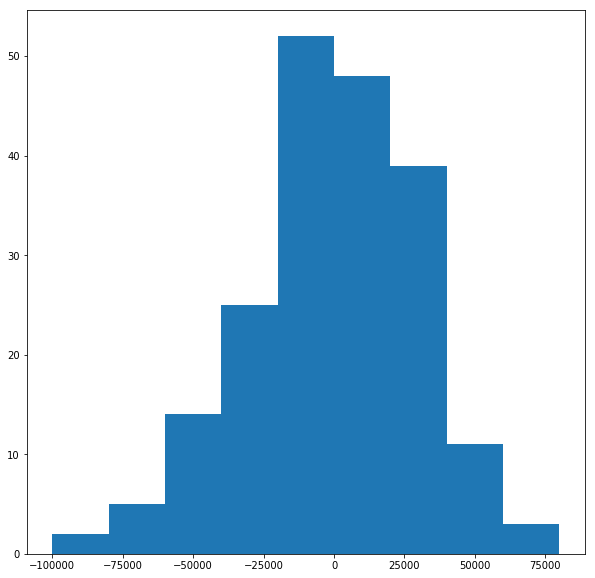

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.hist(ys - predict(weights, xs), bins=range(-100000, 100000, 20000))
plt.show()

### TODO
* Perform normalization/scaling of the data.
* Scikit-learn implementation
* Permutation of data
* !!! separation of testing and training data
* To obtain a feature from the district make it binary (yes/no)
* Build a class from it

Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change algorithm.
</sup></sub></sup></sub></sup></sub>

In [ ]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

Let's plot the weights

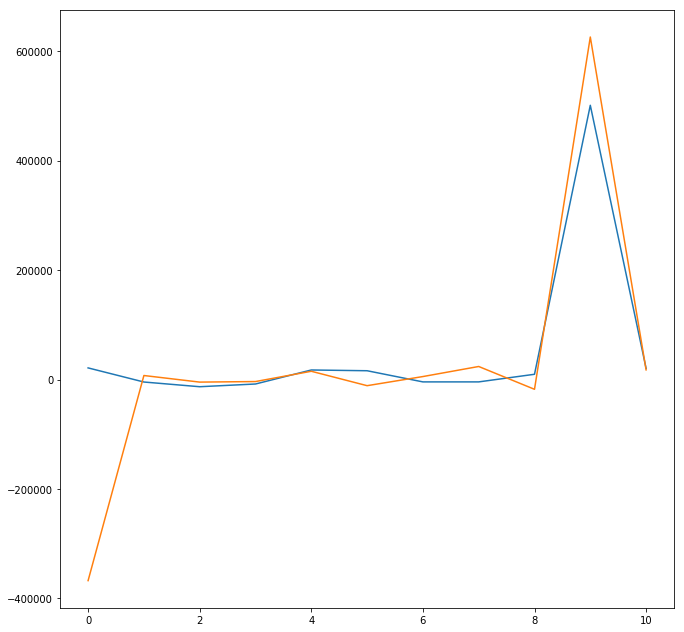

In [173]:
plt.figure(figsize=(11, 11))
plt.plot(weights)
plt.plot(scikit_weights)
plt.show()

In [181]:
testing_set = get_testing_dataset()
ys = testing_set['cena']
xs = get_features(testing_set)
print(evaluate(scikit_weights, xs, ys, regularization=False), 'Testing data loss score scikit solution')
print(evaluate(weights, xs, ys, regularization=False), 'Testing data loss score my solution')

from sklearn.metrics import r2_score
print(r2_score(predict(weights, xs), ys))
print(r2_score(predict(scikit_weights, xs), ys))

29853.558926031976 Testing data loss score scikit solution
68029.10050537605 Testing data loss score my solution
0.927457617902
0.989253942158


/home/michal/Pulpit/jnp_ml/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Questions
* Problems with MSLE -> getting rid of logarithms?
* regularization

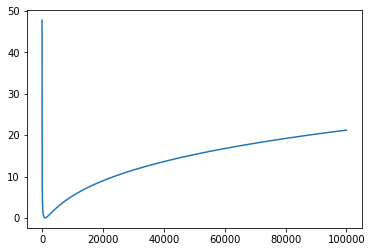

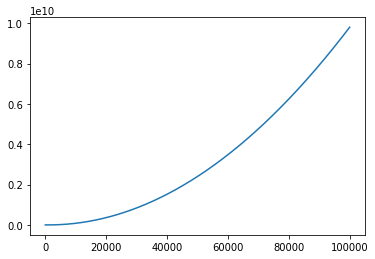

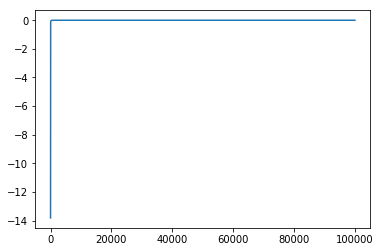

In [14]:
import matplotlib.pyplot as plt
import math

def msle(p, y):
    return (math.log(1 + y) - math.log(1 + p)) ** 2

def l2(p, y):
    return (p - y) ** 2

y = 1000
x = range(0, 100000, 10)

plt.plot(x, [msle(x_i, y) for x_i in x])
plt.show()
plt.plot(x, [l2(x_i, y) for x_i in x])
plt.show()

ps = [-2 * (math.log(1 + y) - math.log(1 + x_i)) / (1 + x_i) for x_i in x]
plt.plot(x, ps)
plt.show()